<p style="text-align: right">
  <img src="../../assets/images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 🚙 06 - PID: Heading control (SOLUTION)


In [1]:
import numpy as np

# Heading control
# Do not change the name of the function, inputs or outputs. It will break things.

def PIDController(v_0, theta_ref, theta_hat, prev_e, prev_int, delta_t): #add theta_ref as input
    """
    Args:
        v_0 (:double:) linear Duckiebot speed (given).
        theta_ref (:double:) reference heading pose
        theta_hat (:double:) the current estiamted theta.
        prev_e (:double:) tracking error at previous iteration.
        prev_int (:double:) previous integral error term.
        delta_t (:double:) time interval since last call.
    returns:
        v_0 (:double:) linear velocity of the Duckiebot 
        omega (:double:) angular velocity of the Duckiebot
        e (:double:) current tracking error (automatically becomes prev_e_y at next iteration).
        e_int (:double:) current integral error (automatically becomes prev_int_y at next iteration).
    """
    
   # Tracking error
    e = theta_ref - theta_hat

    # integral of the error
    e_int = prev_int + e*delta_t

    # anti-windup - preventing the integral error from growing too much
    e_int = max(min(e_int,2),-2)

    # derivative of the error
    e_der = (e - prev_e)/delta_t

    # controller coefficients
    Kp = 5
    Ki = 0.2
    Kd = 0.1

    # PID controller for omega
    omega = Kp*e + Ki*e_int + Kd*e_der
    
    #print(f"\n\nDelta time : {delta_t} \nE : {np.rad2deg(e)} \nE int : {e_int} \nPrev e : {prev_e} \nU : {u} \nTheta hat: {np.rad2deg(theta_hat)} \n")
     
    return v_0, omega, e, e_int

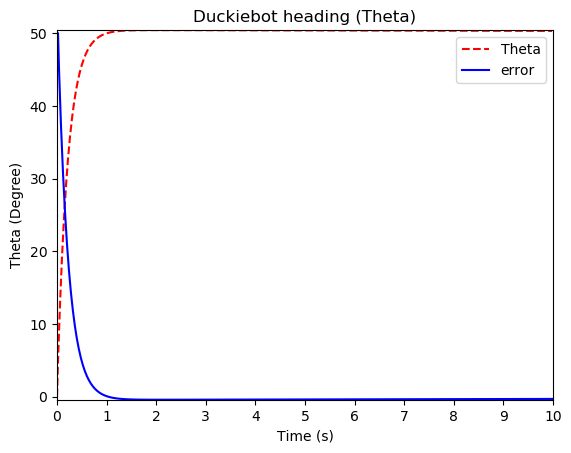

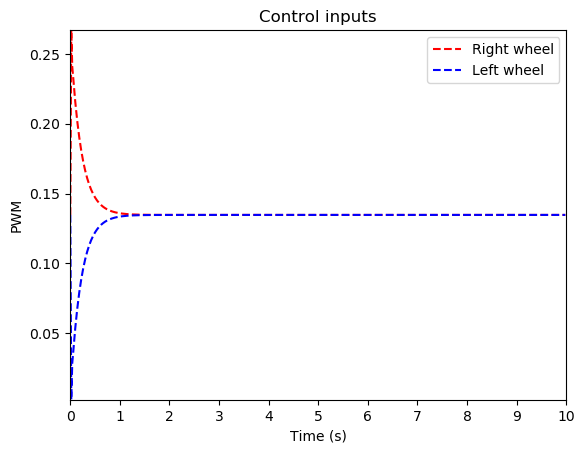

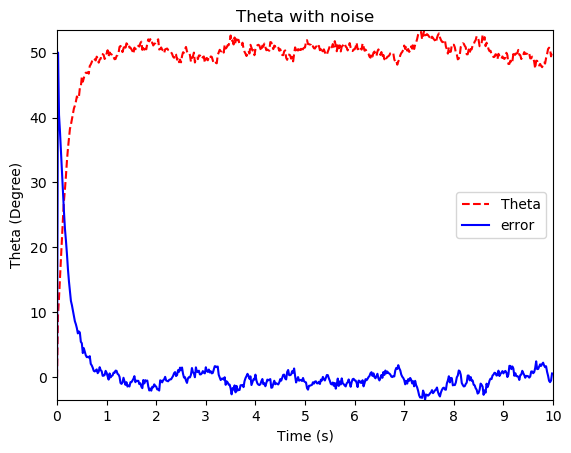

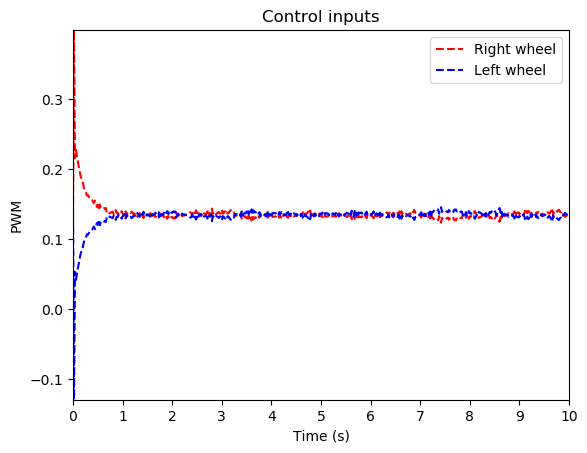

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

import sys
sys.path.append('../../')
from tests.unit_test import UnitTestHeadingPID

# This is for quick testing purposes only - you can try different values of v_init and R, L or the ones you determined before. Try to change R, L for fun.
v_test = 0.2
R_test = 0.033 # m
baseline_test = 0.09 # m
gain_test = 0.6 
trim_test = 0 
thata_ref= 50*np.pi/180 # in rad

# Sanity check (not a faithful representation of the actual behavior, given the motion model is assumed to be exactly known)
unit_test = UnitTestHeadingPID(R_test, baseline_test, v_test,thata_ref, gain_test, trim_test, PIDController) 
unit_test.test()